![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

# Lessons 20 - 21: Matplotlib Basics

This lesson is modified from [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib.html) by [Project Pythia](https://projectpythia.org).


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

## Overview
We will explore using Matplotlib to create various plots. By the end of this lesson, you will be able to
- decide if Matplotlib fits your visualization needs or if you need other plotting libraries
- explain the difference between `Figure` and `Axes`
- create and customize line plots with `subplots`
- utilize different plot types like scatter plots, images, and contour plots (*optional*)

---

## 1. Introduction

1. **[Effective data visualization](https://geo-python-site.readthedocs.io/en/latest/lessons/L1/motivation.html)** is needed as raw data alone is often insufficient for understanding the information it holds.
<br>
<br>
2. **Python has many data visualization libraries** like Matplotlib, Cartopy,  Plotly, Seaborn, GeoCAT-viz, MetPy, Vapor,and Bokeh.
   - When selecting a library for your data visualization needs, consider factors like data type, visualization complexity, and interactivity needs.
   - For example, you can use:
     -  [Matplotlib](https://matplotlib.org/2.0.2/gallery.html) for creating static, animated, and interactive visualizations with a wide range of plotting options,
     -  [Seaborn](https://seaborn.pydata.org/examples/index.html) for creating complex statistical graphics with a high-level interface,
     -  [Plotly](https://plotly.com/python/) for creating interactive visualizations with dynamic capabilities,
     -  [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html) for creating interactive web-based visualizations with interactive tools,
     -  [hvPlot](https://hvplot.holoviz.org/reference/index.html) as a user-friendly tool for creating advanced interactive plots easily,
     -  [Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) for creating static maps with various projections and geospatial data,
     -  [GeoCAT](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html) for specialized geospatial data visualization, particularly for geoscience data,
     -  [MetPy](https://unidata.github.io/MetPy/latest/examples/index.html) when working with weather data,
     -  [Vapor](https://visgallery.ucar.edu/category/visualization-software/vapor/) for interactive 3D visualization, 
     -  or other libraries based on your specific data visualization needs.
   - The [Comparison of Visualization Packages](https://projectpythia.org/advanced-viz-cookbook/notebooks/1-comparison.html) cookbook of Project Pythia offers information and resources to help you get started with these libraries.
<br>
<br>
4. **Matplotlib is widely used** for creating a varity of plots in Python
   - It is suitable for basic to intermediate level plotting needs
   - Matplotlib documentation provides [example plots](https://matplotlib.org/stable/gallery/index.html) for different [plot types](https://matplotlib.org/stable/plot_types/index.html#plot-types)
   - There are many online resources. For example:
       -  [Top 50 Matplotlib Visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) provide codes based on different visualization objectives with emphasis on conveying accurate information, simplicity in design, aesthetics complementing the information, and avoiding information overload.
      - The [geocat gallery](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html) contains visualization examples from many plotting categories of geosciences data.

## 2. Imports

Matplotlib is a Python 2-D plotting library.  It is used to produce publication quality figures in a variety of hard-copy formats and interactive environments across platforms. Matplotlib includes modules such as `pyplot`, `figure`, `axes`, `patches`, `colors`, `cm`, and `colorbar` for creating and customizing plots and visualizations. 
  
Importing `pyplot` from Matplotlib simplifies figure creation with a MATLAB-like interface. Renaming `pyplot` as `plt` is the common convention for brevity. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 3. Prepare plotting data 

### 3.1 Air quality data

In [2]:
# Read the data from the CSV file into a Pandas DataFrame
# Columns: [datetime, 'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3']
# Load the array from file
pre_dates = np.load('data/pre_dates.npy')
pre_values = np.load('data/pre_values.npy')
pre_aqi = np.load('data/pre_aqi.npy')
post_dates = np.load('data/post_dates.npy')
post_values = np.load('data/post_values.npy')
post_aqi = np.load('data/post_aqi.npy')

#Display loaded data
print("pre_dates:", pre_dates.dtype, pre_dates.shape)
print(pre_dates[0],pre_dates[-1])
print("pre_values:", pre_values.dtype, pre_values.shape)
print("pre_aqi:", pre_aqi.dtype, pre_aqi.shape)
print("post_dates:", post_dates.dtype, pre_dates.shape)
print(pre_dates[0],post_dates[-1])
print("post_values:", post_values.dtype, pre_values.shape)
print("post_aqi:", post_aqi.dtype, pre_aqi.shape)

pre_dates: datetime64[us] (358,)
2019-04-01T00:00:00.000000 2020-03-31T00:00:00.000000
pre_values: float64 (358, 6)
pre_aqi: float64 (358, 6)
post_dates: datetime64[us] (358,)
2019-04-01T00:00:00.000000 2021-03-31T00:00:00.000000
post_values: float64 (358, 6)
post_aqi: float64 (358, 6)


### 3.2 Additional information

Let us define some additonal infromation that we may need to improve visualization.

In [3]:
# Define date ranges
lockdown_start = pd.Timestamp('2020-04-01')
one_year_before = pd.Timestamp('2019-04-01')
one_year_after = pd.Timestamp('2021-04-01')

# Air quality parameter information
parameters = [        'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3']
units = [             'µg/m³', 'µg/m³', 'ppb', 'ppb', 'ppm', 'ppm']
limits = [        35 ,      155,    100,   50,     9,  0.07]  # Unhealthy levels of senitive groups

## 4. Matplotlib basics

### 4.1 Axes and Figures

In the context of Matplotlib and plotting in general, understanding the concepts of figures and axes is fundamental. Matplotlib has two core objects:
- The Figure is the top-level container for all plot elements.
- The Axes is the area of the figure where the data is plotted.

**Figure:**

- A Figure in Matplotlib is the top-level container that holds all elements of your plot(s).
- A `Figure` can contain one or more `Axes` objects, which are the individual plots.
- The `Figure` also provides methods for saving plots to files in various formats such as PNG, SVG, etc.
- You can think of the `Figure` as the canvas on which all the plotting occurs.
- You can create a Figure using
  - `plt.figure()`
  - or `plt.subplots()`.

**Axes:**

- The `Axes` in Matplotlib refers to a single plot within a figure and not to the plural form of multiple plots.
- An `Axes` object includes aspects like the x-axis, y-axis, labels, title, and the plot elements themselves.
- An `Axes` object contains various methods for creating plots, including `plot()`, `scatter()`, `bar()`, and many others.
- Within a single `Figure`, you can have multiple `Axes` arranged in a grid.
- You can create `Axes` objects by using:
  - `plt.subplots()` to create both a `Figure` and one or more `Axes` objects  
  - or `fig.add_subplot()` on a `Figure` instance 

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" alt="anatomy of a figure" width="600"/>

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Matplotlib has <a href="https://matplotlib.org/stable/users/explain/figure/api_interfaces.html">two main interfaces</a>. The explicit "Axes" interface uses methods on a Figure or Axes object to create visual elements step by step. Example: Creating a plot with <code>ax.plot()</code>. The implicit "pyplot" interface: Automatically manages Figures and Axes, adding elements to the last created plot. Example: Creating a plot with <code>plt.plot()</code>. In this tutorial, we will use the "Axes" interface.
</div>

### 4.2 Creating a plot in Matplotlib

Creating a plot typically involves the following steps:
- Initiating a `Figure` object, which will be the container for your plots.
- Adding `Axes` to the `Figure`. These can be added using:
  - `plt.subplots()` to create a new `Figure` and `Axes` simultaneously
  -  or `fig.add_subplot()` if you have already created a `Figure`
- Plotting data on the `Axes` by calling plotting methods such as `plot()`, `scatter()`, etc.
- Enhancing the plot with titles, axis labels, legends, and other annotations to make the information clear.
- Finally, displaying the plot with `plt.show()` or saving it with `fig.savefig()`.

## 5. Basic line plot

Plotting with: 
- `fig=plt.figure()` creates a single figure and you can you use `ax=fig.add_subplot()` to add plots.
- `fig,ax=plt.subplots()` creates a single figure with a grid of one or multiple subplots

Both methods will allow you to create a figure with one or multiple subplots. For this tutorial, it is easier to use `plt.subplots()`. 

### 5.1 One subplot

Let use see an example. To plot `pre_values` we need to:
1. Create a `Figure` with dimensions of 10 inches wide and 6 inches long using the `figsize` parameter.
2. create an `Axes` object with a single subplot on the `Figure` using `plt.subplots()`
3. use the `plot` method of the `Axes` object, with
   - datetime data `pre_dates` for the x-axis (i.e., the independent values)
   - and PM2.5 data `pre_values[:,0]` for the y-axis (i.e., the dependent values)

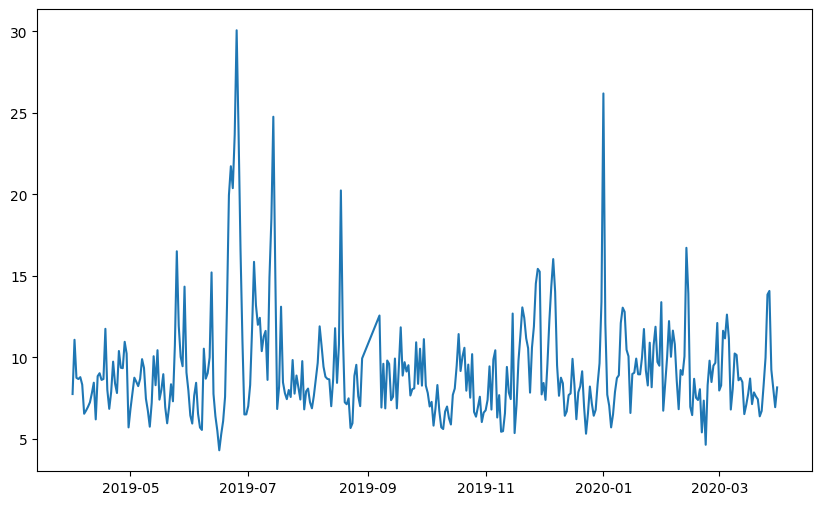

In [4]:
# Create a figure object and Axes object using subplots() method
fig, ax = plt.subplots(figsize=(10,6))

# Plot time  [day] as x-variable and PM2.5 ['µg/m³] as y-variable
ax.plot(pre_dates, #time  [day]
        pre_values[:,0]  #PM2.5 ['µg/m³]
       );

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    By default, <code>ax.plot</code> will create a line plot, as seen in the above example.
</div>

### 5.2 Multiple subplots

Now how to plot PM10 on a different subplot? 

The `subplots()` method takes the arguments `.subplots(rows, columns)`. If we want to plot PM10 below PM2.5 we need a 2x1 grid:
```python
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
```
You can access each Axes using indexing. For example,
```python
ax[0].plot(x,y)
```
Below is a concise example using axes within a figure:

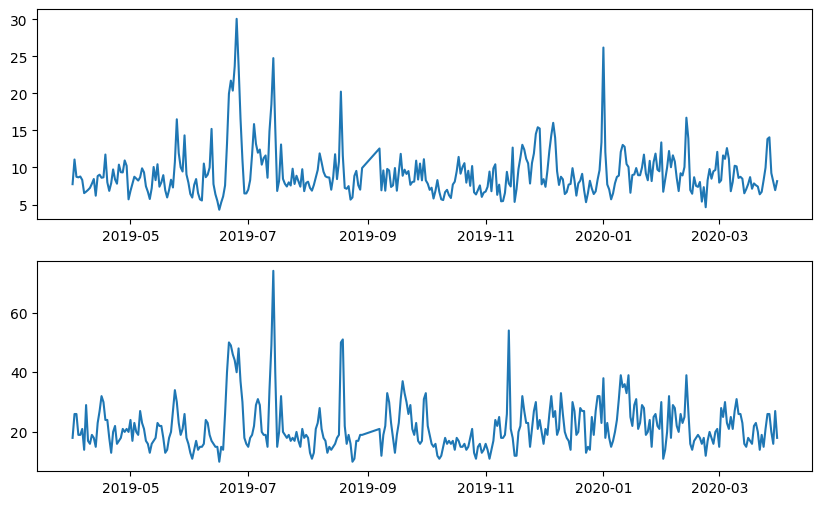

In [5]:
# Create a figure
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plot times as x-variable and air quality parameters as y-variable
ax[0].plot(pre_dates,pre_values[:,0] ); #PM 2.5
ax[1].plot(pre_dates,pre_values[:,1] );  #PM 10

### 5.3 Subplot function

You might have noticed that we called the `subplots` function with the keyword argument `figsize`. Here are some of the keyword arguments that you can use when you call `subplots` or `.add_subplot()` method:

| Keyword          | Description                                 | Common Values / Ranges                       | Example           | `subplots` | `addsubplot` |
|------------------|---------------------------------------------|----------------------------------------------|-------------------|----------|------------|
| nrows            | The number of rows of subplots              | Integer >= 1                                 | 2                 | Yes      | Yes        |
| ncols            | The number of columns of subplots           | Integer >= 1                                 | 2                 | Yes      | Yes        |
| index            | The index of the subplot                    | Integer starting from 1                      | 1                 | No       | Yes        |
| figsize          | Size of the figure in inches                | Tuple (width, height) in inches              | figsize=(8, 6)    | Yes      | No         |
| sharex           | Share the x-axis with other subplots        | Boolean (True/False)                         | sharex=True       | Yes      | Yes        |
| sharey           | Share the y-axis with other subplots        | Boolean (True/False)                         | sharey=True       | Yes      | Yes        |
| xlabel           | The label for the x-axis                    | Any text                                     | xlabel="X-axis"   | No       | Yes        |
| ylabel           | The label for the y-axis                    | Any text                                     | ylabel="Y-axis"   | No       | Yes        |
| title            | The title of the subplot                    | Any text                                     | title="Main Plot" | Yes      | Yes        |
| xlim             | The limits for the x-axis                   | Tuple (min, max)                             | xlim=(0, 10)      | No       | Yes        |
| ylim             | The limits for the y-axis                   | Tuple (min, max)                             | ylim=(0, 20)      | No       | Yes        |
| xticks           | The positions of tick marks on the x-axis   | List of values                               | xticks=[0, 5,10]  | No       | Yes        |

These are just a few common keyword arguments used with these two methods to customize and configure subplots in a figure.

Let us try one of these keyowrds. Let us try to remove the ticks of x-axis of the upper plot, since both plots share the same axis. We can use the `sharex` argument.

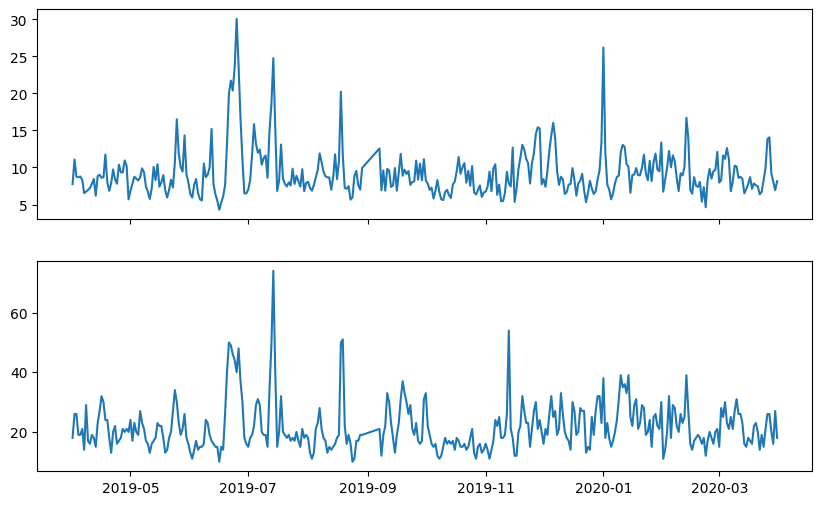

In [6]:
# Create a figure
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot times as x-variable and air quality parameters as y-variable
ax[0].plot(pre_dates,pre_values[:,0] ); #PM 2.5
ax[1].plot(pre_dates,pre_values[:,1] );  #PM 10

### 5.4 Plotting multiple graphs on the same axis

We can call `.plot()` more than once to add more plots to our Axes. Let rewrite the above code to plot both pre and post data only for PM2.5

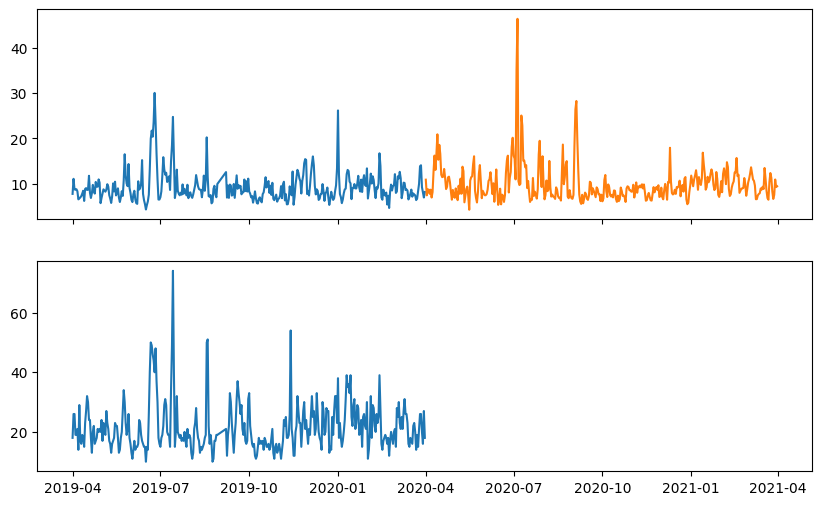

In [7]:
# Create a figure
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot times as x-variable and air quality parameters as y-variable for PM2.5
ax[0].plot(pre_dates,pre_values[:,0] ); #PM 2.5
ax[0].plot(post_dates,post_values[:,0] ); #PM 2.5

# Plot times as x-variable and air quality parameters as y-variable for PM10
ax[1].plot(pre_dates,pre_values[:,1] );  #PM 10


## 6. Customizing plot

### 6.1 Customizing plot with `Axes` object

Let us look at post-plot customization by leveraging the `Axes` object in Matplotlib. We can specify "Time" as x-axis label and "PM2.5" as y-axis label. This is achieved through the `ax.set_xlabel()` and `ax.set_ylabel()` methods, respectively.

Let us add labels and visualize the updated the above figure:

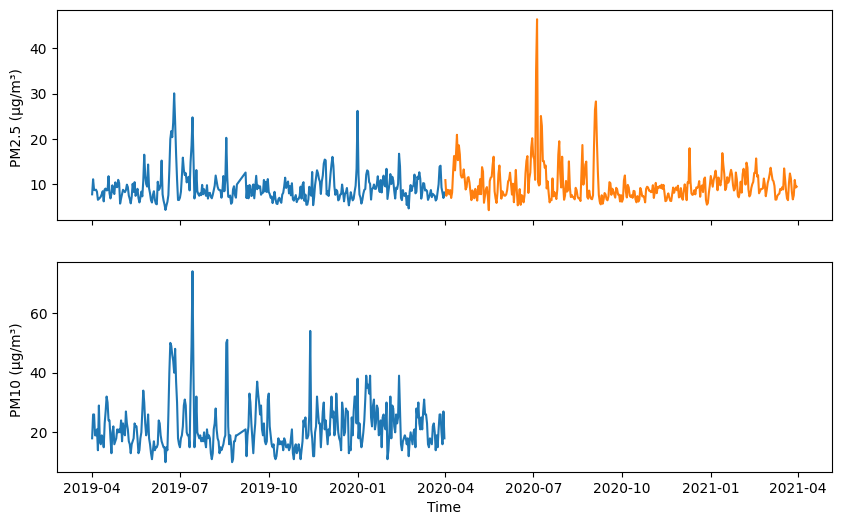

In [8]:
# Add some labels to the y-axis
ax[0].set_ylabel(f'{parameters[0]} ({units[0]}) ')
ax[1].set_ylabel(f'{parameters[1]} ({units[1]}) ')

# Add some labels to x-axis
ax[1].set_xlabel('Time')

# Prompt the notebook to re-display the figure after we modify it
fig

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    If you have Figure object stored in a variable named <code>fig</code>, you can display it using <code>plt.show(fig)</code>, or simply by placing the variable name <code>fig</code> at the end of the code. This prompts the notebook to re-display the figure after modifications have been made to it rather than recreating the figure from scratch. 
</div>

The `set_xlabel` and `set_ylabel` are methods in `Axes` object. Here are a few others for creating and modifying plots using Axes objects. 


**Labels and Title**
| Method         | Description                               |
|-------------------------|-------------------------------------------|
| `ax.set_xlabel('Time')`       | Set the label for the x-axis to 'Time'             |
| `ax.set_ylabel('Value')`       | Set the label for the y-axis to 'Value'             |
| `ax.set_title('Sample Plot')`        | Set the title of the plot to 'Sample Plot'                 |

**Legends and Grid**
| Method         | Description                               |
|-------------------------|-------------------------------------------|
| `ax.legend(['A', 'B', 'C'])`           | Add a legend with labels 'A', 'B', 'C' to the plot                  |
| `ax.grid(True, linestyle='--')`             | Add grid lines to the plot with a dashed linestyle                |
    
**Axis Limits and Ticks**
| Method       | Description                               |
|-------------------------|-------------------------------------------|
| `ax.set_xlim(0, 10)`         | Set the limits for the x-axis from 0 to 10             |
| `ax.set_ylim(0, 100)`         | Set the limits for the y-axis from 0 to 100             |
| `ax.set_xticks([0, 5, 10])`       | Set the positions of the x-axis ticks at 0, 5, 10     |
| `ax.set_yticks([0, 50, 100])`       | Set the positions of the y-axis ticks at 0, 50, 100     |
| `ax.set_xticklabels(['low', 'medium', 'high'])`  | Set the labels for the x-axis ticks as 'low', 'medium', 'high'    |
| `ax.set_yticklabels(['start', 'mid', 'end'])`   | Set the labels for the y-axis ticks as 'start', 'mid', 'end'      |
| `ax.tick_params(axis='x', rotation=45)`   | Rotate x-axis tick labels by 45 degrees     |

 **Annotation and Lines**
| Method         | Description                               |
|-------------------------|-------------------------------------------|
| `ax.text(0, 80, 'Peak', fontsize=12)`             | Add the text 'Peak' at coordinates (0, 80) with font size 12           |
| `ax.annotate('Max', xy=(5, 90), xytext=(3, 95), arrowprops=dict(facecolor='black', shrink=0.05))`         | Add an annotation 'Max' at point (5, 90) with an arrow pointing to (3, 95)              |
| `ax.axhline(y=50, color='r', linestyle='--')`          | Add a horizontal dashed line at y=50 with red color              |
| `ax.axvline(x=7, color='g', linestyle=':')`          | Add a vertical dotted line at x=7 with green color            |
| `ax.axhspan(20, 40, alpha=0.3, color='yellow')`          | Add a yellow shaded area between y=20 and y=40 with transparency 0.3          |
| `ax.axvspan(2, 5, alpha=0.5, color='gray')`          | Add a gray shaded area between x=2 and x=5 with transparency 0.5           |

**Plotting and Visualization**
| Method        | Description                               |
|-------------------------|-------------------------------------------|
| `ax.plot(x, y, linestyle='-', marker='o', color='purple')`             | Plot lines connecting data points with circular markers in purple color          |
| `ax.scatter(x, y, s=100, c='red', marker='s')`          | Make a scatter plot with red squares of size 100                   |
| `ax.fill_between(x, y1, y2, color='gray', alpha=0.5)`          | Fill area between two curves with gray color and transparency 0.5           |
| `ax.imshow(image, cmap='viridis')`           | Display an image on the axes using the 'viridis' colormap               |
| `ax.hist(data, bins=20, color='orange')`             | Plot a histogram of data with 20 bins and orange color                 |
| `ax.bar(categories, values, color='skyblue')`              | Plot vertical bars with sky blue color for each category               |
| `ax.barh(categories, values, color='lightgreen')`             | Plot horizontal bars with light green color for each category            |
| `ax.errorbar(x, y, yerr=0.1, fmt='o', color='blue')`          | Plot error bars with a blue color for data points with y error of 0.1           |

For more details on the keyword arguments each method can take, use help functions like `ax[1].set_ylabel?` or `help(ax[1].set_label)`.

In [9]:
ax[1].set_ylabel?

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Note you  would need to have <code>`ax`</code>, defined before you can access help for its methods like <code>`set_xlabel</code>,
</div>

#### Test your understanding

For both plots (PM2.5 and PM10), add a title to a plot and adjust the font size:
- Use `ax.set_title()` to set the plot title
- with `fontsize` keyword to set font size. of the title

For the first plot (PM2.5), add a black dotted horizontal line indicating the healthy limit only when the air quality parameter exceeds healthy limit. 
- Use `ax.axhline()` to add a horizontal line
- at `y` equal to healty limit of that air quality healty limit
- if max(pre_post_data of PM2.5) >= healthy limit of PM 2.5 

Let us try it out

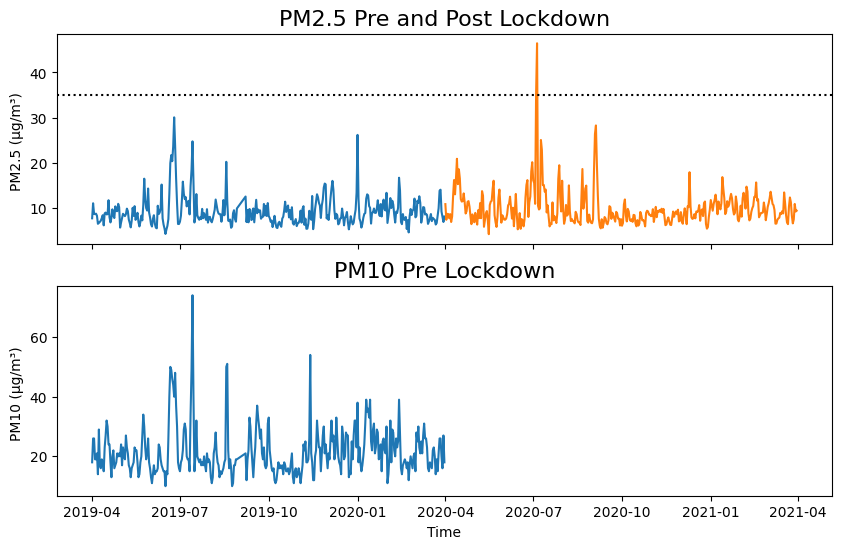

In [10]:
#Add title and increase title font size to 16
ax[0].set_title('PM2.5 Pre and Post Lockdown', fontsize=16)
ax[1].set_title('PM10 Pre Lockdown', fontsize=16)

#Add horizontal line
max_value = np.max([pre_values[:,0].max(), post_values[:,0].max()])
if max_value >= limits[0]:
    ax[0].axhline(limits[0],color='black',linestyle='dotted')
    
#Display updated figure
fig

### 6.2 Cutomize plot when calling `.plot()` function

Instead of customizing the plot using `ax.` after its creation, you can create the plot with customization directly. Let us try to:
1. add legened for pre and post at upper left,
2. have blue line for pre and red line for post,
3. add gird to each subplot.

and do not forget to add axis labels as we did before.

To add a legend to each subplot:
- Use `label` keyowrd of `plot` in each `plot` call to create legend labels automatically.
- Use the `legend` method of `Axes` to display the legend labels.
- Use the `loc` keyword of `legend` method to set the legend location 

To change line colors:
- Use`color` keyword of `plot` in each `plot` call to specify the desired colors for "pre" (blue) and "post" (red)

To add grid:
- Use grid method of `Axes` to add a grid to the `Axes` objects 

Let us try it out:

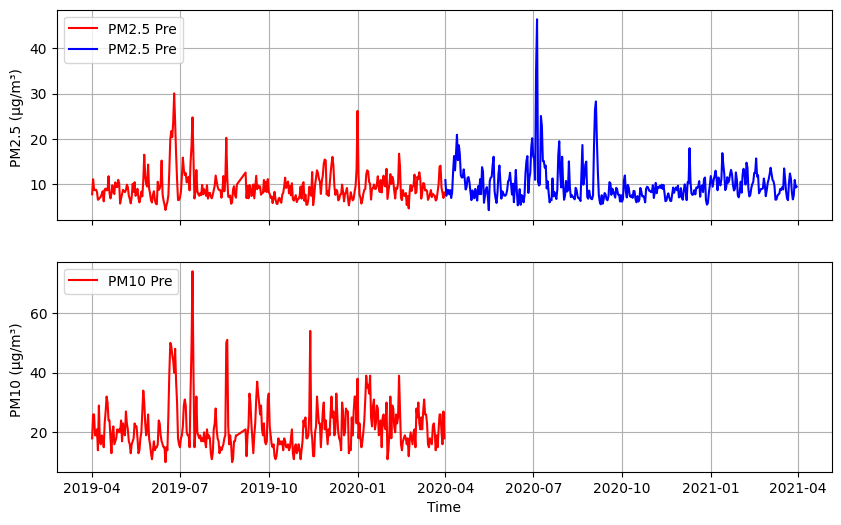

In [11]:
# Create a 2x1 grid figure with sharex=True
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot time versus PM 2.5 with label and color blue for pre and red for post 
ax[0].plot(pre_dates,     #time
           pre_values[:,0],     #PM2.5
           label='PM2.5 Pre', #Legend label
           color='red'        #Line color
          ); #pre
ax[0].plot(post_dates,     #time
           post_values[:,0],     #PM2.5
           label='PM2.5 Pre', #Legend label
           color='blue'        #Line color
          ); #post

# Plot time versus PM 10 with label and color blue for pre and red for post 
ax[1].plot(pre_dates,     #time
           pre_values[:,1],     #PM10
           label='PM10 Pre', #Legend label
           color='red'        #Line color
          ); #pre

# Add a legend to the upper left corner of the plot
ax[0].legend(loc='upper left');
ax[1].legend(loc='upper left');

# Add gridlines
ax[0].grid(True)
ax[1].grid(True)

# Add some labels to the y-axis
ax[0].set_ylabel(f'{parameters[0]} ({units[0]}) ')
ax[1].set_ylabel(f'{parameters[1]} ({units[1]}) ')

# Add some labels to x-axis
ax[1].set_xlabel('Time');

Here are some keyword arguments of the `.plot` function in Matplotlib:

| Keyword          | Description                                 | Common Values / Ranges                                    | Example           |
|------------------|---------------------------------------------|-----------------------------------------------------------|-------------------|
| x                | The x-coordinates of the data points        | Any numerical values                                      | [1, 2, 3, 4, 5]  |
| y                | The y-coordinates of the data points        | Any numerical values                                      | [10, 20, 15, 30, 25] |
| label            | The label for the data series               | Any text                                                  | label= "Data Points"     |
| color            | The color of the line                       | Any color name or code                                    | color="blue"            |
| linestyle        | The style of the line (solid, dashed, etc)  | "solid" or "-"(solid line), "dashed" or "--", "dotted" or ":", "dashdot" or "-."      | linestyle="dashed"          |
| linewidth        | The width of the line                       | Any numerical values                                      | linewidth=2                 |
| marker           | The marker style for data points            | "o" (circle), "." (point), "^" (triangle), "s" (square), "d" (diamond), "*" (star),"+" (plus sign)| marker="o"         |
| markersize       | The size of the markers                     | Any numerical values                                      | markersize= 8                 |
| markerfacecolor  | The face color of the markers               | Any color name or code                                    | markerfacecolor="red"             |
| markeredgewidth  | The width of the marker edges               | Any numerical values                                      | markeredgewidth= 1                 |
| alpha            | The transparency of the line                | Range: 0 (completely transparent) to 1 (completely opaque)| alpha= 0.5               |
| zorder           | The z-order of the line (layering order)    | Any numerical values                                      | zorder=2                 |
| visible          | Whether the line is visible or not          | True or False                                             | visible=True              |
| cmap             | The colormap for coloring the line          | Any colormap name                                         | cmap="viridis"         |
| clip_on          | Whether to clip the line to the axes or not | True or False                                             | clip_on=False             |
| solid_capstyle   | The cap style for solid linestyle            | "butt", "round", "projecting"                            | solid_capstyle="butt"            |
| solid_joinstyle  | The join style for solid linestyle           | "miter", "round", "bevel"                                | solid_joinstyle="miter"           |

#### Test your understanding

For the code below add `.plot()` keywords to cutomize your post PM2.5 plot
- line color black 
- with dotted lines
- linewidth 2

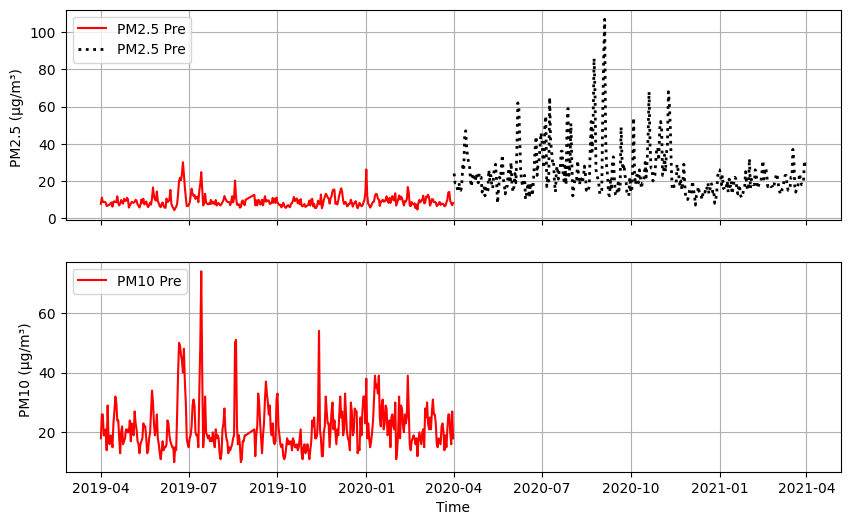

In [12]:
# Create a 2x1 grid figure with sharex=True
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot time versus PM 2.5 with label and color blue for pre and red for post 
ax[0].plot(pre_dates,     #time
           pre_values[:,0],     #PM2.5
           label='PM2.5 Pre', #Legend label
           color='red'        #Line color
          ); #pre
ax[0].plot(post_dates,     #time
           post_values[:,1],     #PM2.5
           label='PM2.5 Pre', #Legend label
           color='black',        #Line color
           linestyle="dotted",   #Line style
            linewidth=2        #Change linewidth
          ); #post

# Plot time versus PM 10 with label and color blue for pre and red for post 
ax[1].plot(pre_dates,     #time
           pre_values[:,1],     #PM10
           label='PM10 Pre', #Legend label
           color='red'        #Line color
          ); #pre

# Add a legend to the upper left corner of the plot
ax[0].legend(loc='upper left');
ax[1].legend(loc='upper left');

# Add gridlines
ax[0].grid(True)
ax[1].grid(True)

# Add some labels to the y-axis
ax[0].set_ylabel(f'{parameters[0]} ({units[0]}) ')
ax[1].set_ylabel(f'{parameters[1]} ({units[1]}) ')

# Add some labels to x-axis
ax[1].set_xlabel('Time');

### 6.3 Customizing plot with `Figure` object

In the above plot, we can improve the visual appeal by reducing spacing between the two subplot. This is adjustment involves the `Figure` object rather than the `Axes` objects. By increasing the vertical space between subplots using `fig.subplots_adjust(hspace=)`, we can improve the layout.

Let us try this:

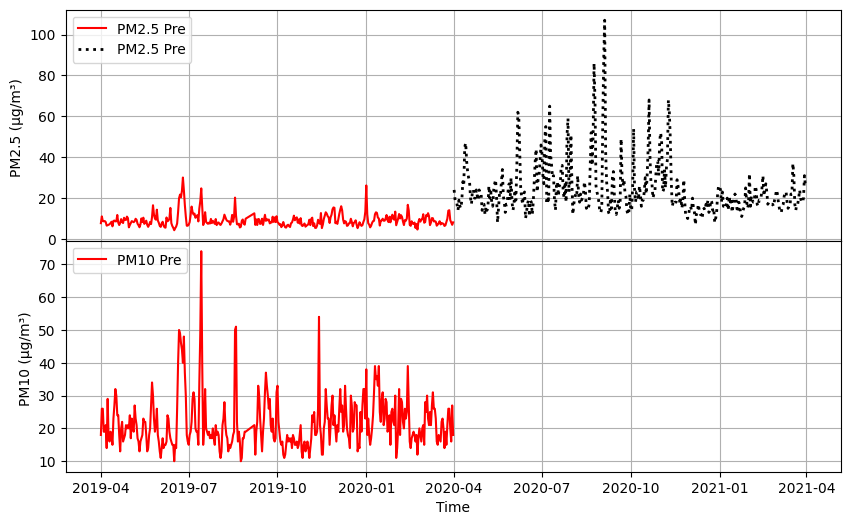

In [13]:
# Reduce the vertical space between subplots to 0.05 inches or 0 inches
fig.subplots_adjust(hspace=0)

#Display updated figure
fig

There other methods associated with `Figure` objects as follows.

**Adjusting Layout**
| Method               | Description                                 |
|------------------------------|---------------------------------------------|
| `fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)`      | Adjust the spacing between subplots by setting the margins for left, right, bottom, and top |
| `fig.tight_layout(pad=1.0)`         | Automatically adjust subplot parameters with additional padding specified     |
| `fig.set_constrained_layout_pads(w_pad=2.0, h_pad=2.0, hspace=0.2, wspace=0.2)`         | Set padding between subplots and adjust horizontal and vertical spacing     |

**Saving and Displaying**
| Method               | Description                                 |
|------------------------------|---------------------------------------------|
| `fig.savefig('plot.png', dpi=300)`               | Save the figure to a file with a specific resolution                   |
| `fig.canvas.draw_idle()`                  | Redraw the figure canvas, updating it if changes have been made                           |
| `fig.show(warn=True)`                  | Display the figure with a warning if there are potential issues                           |

These examples demonstrate further functionalities for adjusting layout and saving/displaying figures. 

### 6.4 Customizing colors

When customizing colors in your visualizations, the `color` attribute offers various options for color representation:

- **Named Colors**: You can use named colors such as `red` and `blue` for convenience.
- **HTML Color Codes**: Specify colors using hexadecimal color codes (#RRGGBB), like `#FFA500` for red and `#008000` for blue.
- **RGB Color Codes**: Utilize RGB color codes in the range of 0 to 255, such as `(255, 0, 0)` for red and `(0, 0, 255)` for blue.
- **RGBA Color Codes**: Include an alpha channel for transparency with RGBA color codes, for example, `(255, 0, 0, 0.5)`.

Color maps (colormaps) map scalar data values to colors in visualizations, aiding in visualizing data gradients and patterns. Matplotlib provides [various built-in color maps]((https://matplotlib.org/stable/users/explain/colors/colormaps.html)) tailored for different data types. Understanding color maps can enhance plot interpretability and aesthetic appeal.

For more detailed information, you can refer to the [list of named colors in Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html) or learn about [specifying colors in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def).

## 7. Class Exercise: Putting this all together

Complete the code below by:
1. plotting pre and post data for the six parameter with legend (Hint: use for loop)
2. removing horizontal spacing between subplots using `fig.subplots_adjust()` with `hspace` keyword
3. setting x-axis limits from '2019-01-01' to '2021-01-01' using `ax.set_xlim()` with the aid of `pd.to_datetime('2019-04-01')` to convert string to datetime

Let us try it out:

PM2.5 exceeds healthy limit 35


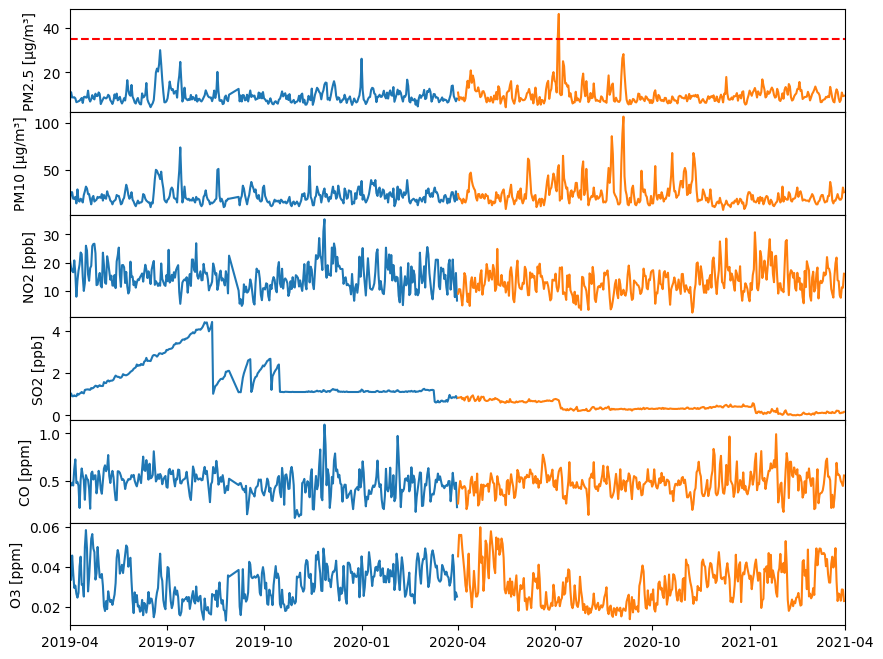

In [14]:
#Create Figure and Axes objects (6x1) 
# with figure size 10 inche long by 8 wide inches and shared x-axis
fig, ax = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

#Change horizontal spaces between subplot
fig.subplots_adjust(hspace=0)
    
for index, (parameter, unit, limit) in enumerate(zip(parameters, units, limits)):
    
    # Plot times as x-variable and air qualiy parameter as y-variable
    ax[index].plot(pre_dates, pre_values[:, index])   #pre
    ax[index].plot(post_dates, post_values[:, index]) #post 
    
    # Add a horizontal line for healthy limit
    if (limit<= pre_values[:, index].max()) or (limit <= post_values[:, index].max()):
        print(f"{parameter} exceeds healthy limit {limit}")
        ax[index].axhline(y=limit, color='r', linestyle='--', label='Healthy Limit')
    
    # Set the x-axis limits using the datetime objects
    # Note we need to convert date strings to datetime objects because our NumPy area has datetime
    ax[index].set_xlim(pd.to_datetime('2019-04-01') , pd.to_datetime('2021-04-01'))
    
    # Set y-label
    ax[index].set_ylabel(f"{parameter} [{unit}]");

## 8. Scatterplot (*optional*)
Some data cannot be plotted accurately as a line plot.  Another type of plot that is popular  is the marker plot, more commonly known as a scatter plot. A simple scatter plot can be created by setting the `linestyle` to `None`, and specifying a marker type, size, color, etc., like this:

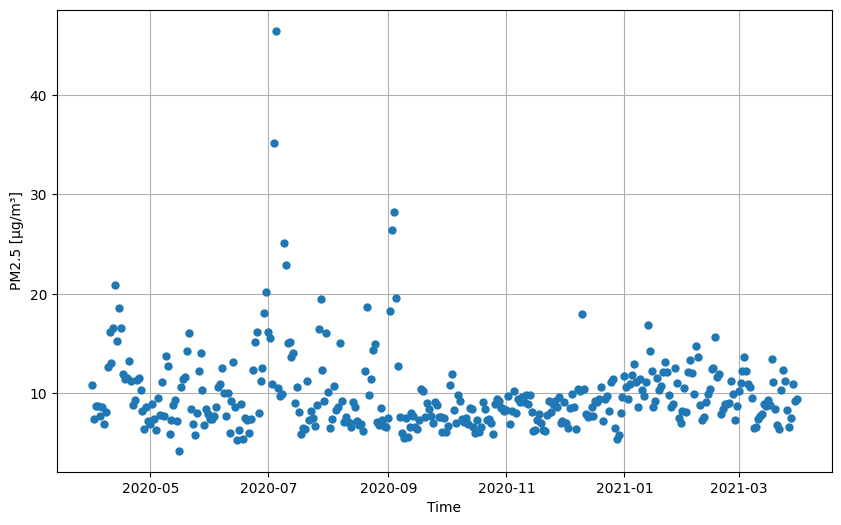

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify no line with circle markers
ax.plot(post_dates, post_values[:,0], #x,y
        linestyle='None', #no line
        marker='o', #marker style
        markersize=5) #marker size

ax.set_xlabel('Time')
ax.set_ylabel(f'{parameters[0]} [{units[0]}]')
ax.grid(True)

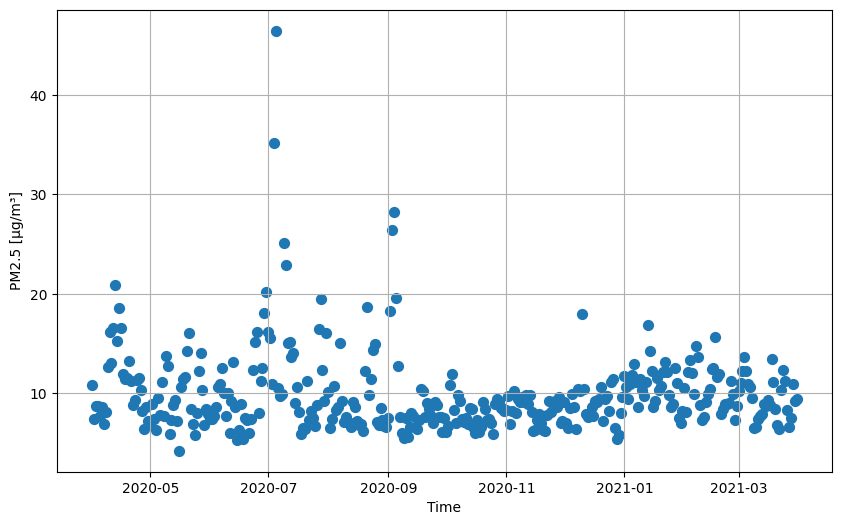

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify no line with circle markers
ax.scatter(post_dates, post_values[:,0], #x,y
           marker='o', #marker style 
           s=50) #marker size 

ax.set_xlabel('Time')
ax.set_ylabel(f'{parameters[0]} [{units[0]}]')
ax.grid(True)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    You can also use the <code>scatter</code> method, which is slower, but will give you more control, such as being able to color the points individually based upon a third variable.
</div>


Let us make different colors for dots such that values below healty limit is back and above healthy limit is read.

Here is how to assign colors to dots based on air quality:
* Start with the provided code snippet
* Define colors for markers based on air quality values
* Include the `c` keyword argument in the `scatter` function call

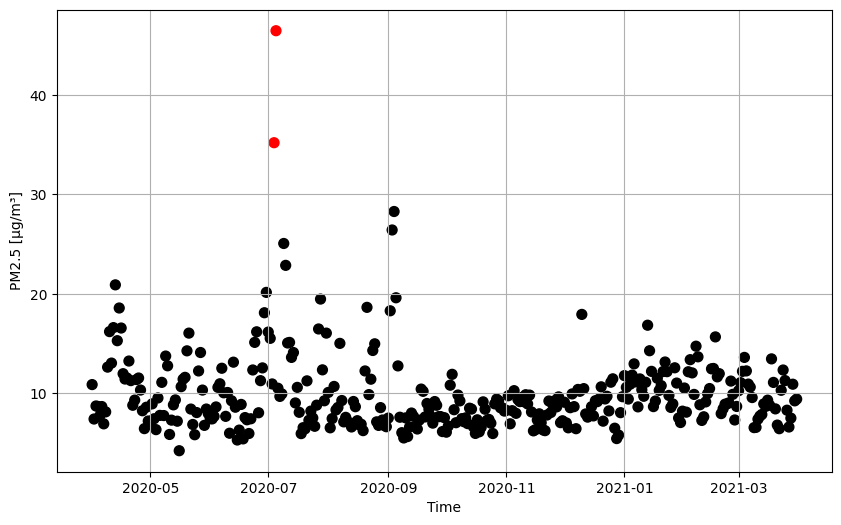

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# Creating an array of strings using np.full() with black color
marker_colors = np.full(post_dates.shape[0], "black")

# Change black to red for values >= healthy limit 
Check = post_values[:,0] >= limits[0]
marker_colors[Check] = 'red'

# Specify no line with circle markers
ax.scatter(post_dates, post_values[:,0], #x,y
           c=marker_colors,   # the color value of each marker
           marker='o', #marker style 
           s=50) #marker size 

ax.set_xlabel('Time')
ax.set_ylabel(f'{parameters[0]} [{units[0]}]')
ax.grid(True)

## 9. Displaying images (*optional*)

`imshow` displays the values in an array as colored pixels, similar to a heat map.

Here, we declare some fake data in a bivariate normal distribution, to illustrate the `imshow` method:

In [18]:
# Create an array of values from -3.0 to 3.0 with a step size of 0.025 for both x and y
x = y = np.arange(-3.0, 3.0, 0.025)

# Create a meshgrid using the x and y values
X, Y = np.meshgrid(x, y)

# Calculate Z1 and Z2 based on exponential functions with X and Y
Z1 = np.exp(-(X**2) - Y**2)
Z2 = np.exp(-((X - 1) ** 2) - (Y - 1) ** 2)

# Calculate Z as the difference between Z1 and Z2 multiplied by 2
Z = (Z1 - Z2) * 2

# Print the shapes of arrays X, Y, and Z
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")
print(f"Z: {Z.shape}")

X: (240, 240)
Y: (240, 240)
Z: (240, 240)


We can now pass this fake data to `imshow` to create a heat map of the distribution:

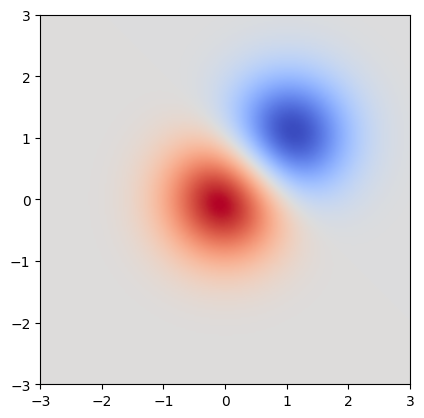

In [19]:
# Create a new figure and its subplot
fig, ax = plt.subplots()

# Display the 2D array Z as an image on the subplot ax
im = ax.imshow(
    Z,                   # The 2D array of data to be plotted as an image
    interpolation='bilinear',  # Specifies the interpolation method for displaying the image
    cmap='coolwarm',           # Sets the colormap for the image plot to 'coolwarm'
    origin='lower',            # Sets the origin of the image data to be at the lower left corner
    extent=[-3, 3, -3, 3]     # Sets the extent of the image data along the x and y axes
)


## 10. Contour and filled contour plots (*optional*)

- `contour` creates contours around data.
- `contourf` creates filled contours around data.

Let's start with the `contour` method, which, as just mentioned, creates contours around data:

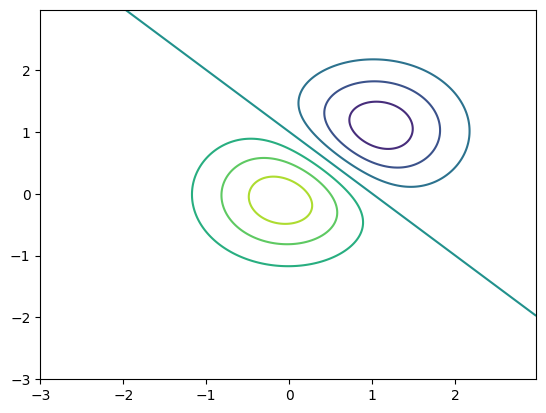

In [20]:
# Create a new figure and its subplot
fig, ax = plt.subplots()

# Create contour lines on the subplot ax using the meshgrid X, Y, and data Z
ax.contour(X, Y, Z);

After creating contours, we can label the lines using the `clabel` method, like this:

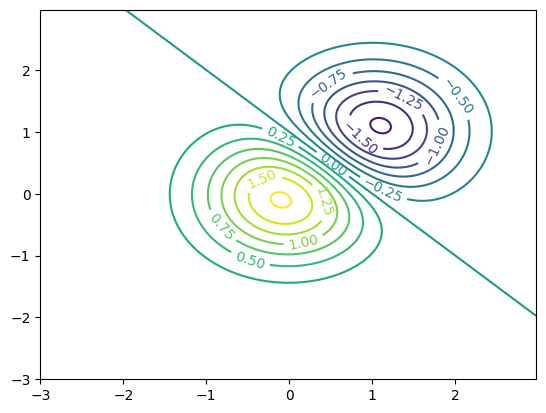

In [21]:
# Create a new figure and its subplot
fig, ax = plt.subplots()

# Create contour lines on the subplot ax using the meshgrid X, Y, and data Z with specified levels
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.25))

# Label the contour lines on the plot
ax.clabel(c);

As described above, the `contourf` (contour fill) method creates filled contours around data, like this:

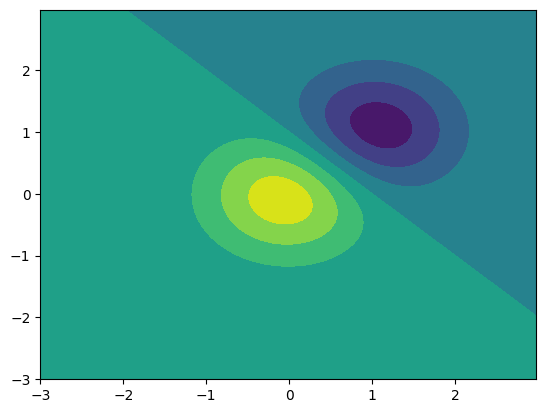

In [22]:
# Create a new figure and its subplot
fig, ax = plt.subplots()

# Create filled contour plot on the subplot ax using the meshgrid X, Y, and data Z
c = ax.contourf(X, Y, Z);

As a final example, let's create a heatmap figure with contours using the `contour` and `imshow` methods.  First, we use `imshow` to create the heatmap, specifying a colormap using the `cmap` keyword argument.  We then call `contour`, specifying black contours and an interval of 0.5.  Here is the example code, and resulting figure:

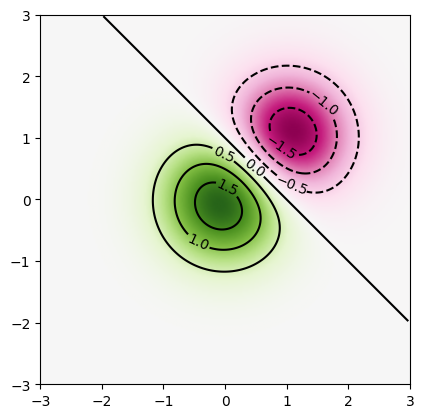

In [23]:
# Create a new figure and its subplot
fig, ax = plt.subplots()

# Display an image (imshow) of the data Z on the subplot ax with specified settings
im = ax.imshow(   # Display an image of the data Z on the subplot ax with specified settings
    Z, interpolation='bilinear', # Use bilinear interpolation for smoother image display
    cmap='PiYG',  # Use the PiYG colormap for coloring the image
    origin='lower', # Set the origin of the image to be at the lower left corner
    extent=[-3, 3, -3, 3] # Set the extent of the image in the plot
)

# Add contour lines on the plot
c = ax.contour( # Create contour lines on the plot
    X, # X coordinates for the contour plot
    Y, # Y coordinates for the contour plot
    Z, # Data values for the contour plot
    levels=np.arange(-2, 2, 0.5), # Specify the levels at which contour lines should be drawn
    colors='black' # Set the color of the contour lines to black
) 

# Label the contour lines on the plot
ax.clabel(c);

## 11. Heatmap plot (*optional*)

A `matshow` plot is a type of heatmap that displays a matrix of data as a color-encoded image. Each cell in the matrix is represented by a colored square, with colors indicating the values in the matrix. It is useful for visualizing relationships or patterns in the data, such as correlations between variables in a correlation matrix. The color intensity represents the magnitude of the values, making it easy to identify trends or clusters within the data.

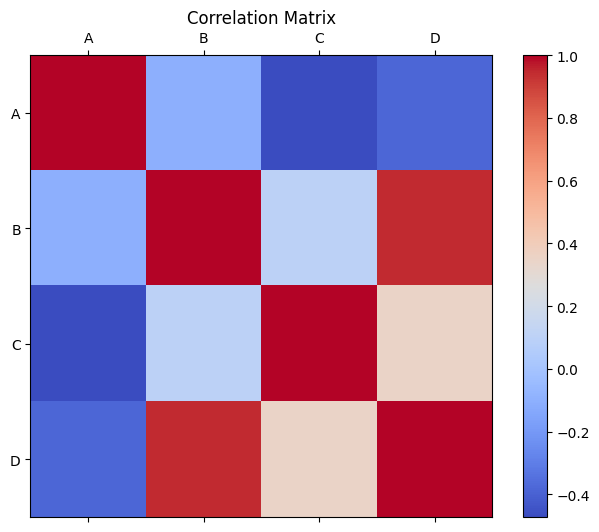

In [24]:
# Generate a random correlation matrix
data = np.random.rand(4, 4)
correlation_matrix = np.corrcoef(data, rowvar=False)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.matshow(correlation_matrix, cmap='coolwarm')

# Set x-axis and y-axis labels
ax.set_xticks(np.arange(len(correlation_matrix)))
ax.set_yticks(np.arange(len(correlation_matrix)))
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.set_yticklabels(['A', 'B', 'C', 'D'])

fig.colorbar(im, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


## 12. Automating subplot index in a loop (*optional*)

If you want to work with an m x n grid, automating the indexing process can be beneficial, particularly in loop scenarios. You can achieve this automation using `index // n` and `index % n`. For instance, in a 2 x 3 subplot grid, you would access the Axes using `ax[index // 3, index % 3]`.

Here is an example:

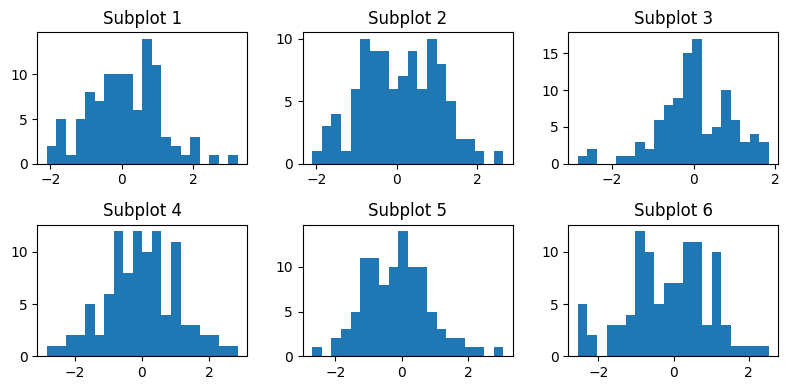

In [25]:
# Generate sample data for 3x2 subplots
data = [np.random.normal(0, 1, 100) for _ in range(6)]

# Create a figure object and Axes object using subplots() method
n = 2 #Number of rows
m = 3 #Number of colums

fig, ax = plt.subplots(n, m, figsize=(8, 4))

# Plot data on each subplot
for index in range(6):
    ax[index // m, index % m].hist(data[index], bins=20)  # Plot histogram for sample data
    ax[index // m, index % m].set_title(f'Subplot {index + 1}')  # Set subplot title

plt.tight_layout()
plt.show()

In the provided code, the expression `ax[index // 3, index % 3]` is used to access each subplot within a 2x3 grid of subplots. The `//` and `%` operations compute the row and column indices in the grid, making element access and traversal easier during iteration. 
- The modulo operation `%` gives the remainder after division, ensuring the column index remains within the range of 0 to 2, allowing for cyclic behavior in element indexing.
- Integer division `//` divides two numbers and provides the integer part of the quotient, neglecting any remainder, which helps in keeping the row index within the range of 0 to 2.

Combining these two expressions (`index // 3` for rows and `index % 3` for columns) allows us to access each subplot in the 2x3 grid systematically. This correctly maps the loop variable `index` to the corresponding row and column indices in the 2x3 grid, enabling dynamic subplot within the loop iteration.

In [26]:
for index in range(10):
    print(index // 3, index % 3)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0


## 13. Boxplot for multiple datasets with for-loop (*optional*)

Here we create box plots for multiple datasets iteratively using a for loop in Matplotlib. This example show how to add data one by one and then display the box plots together. 

Here is how you can achieve this:

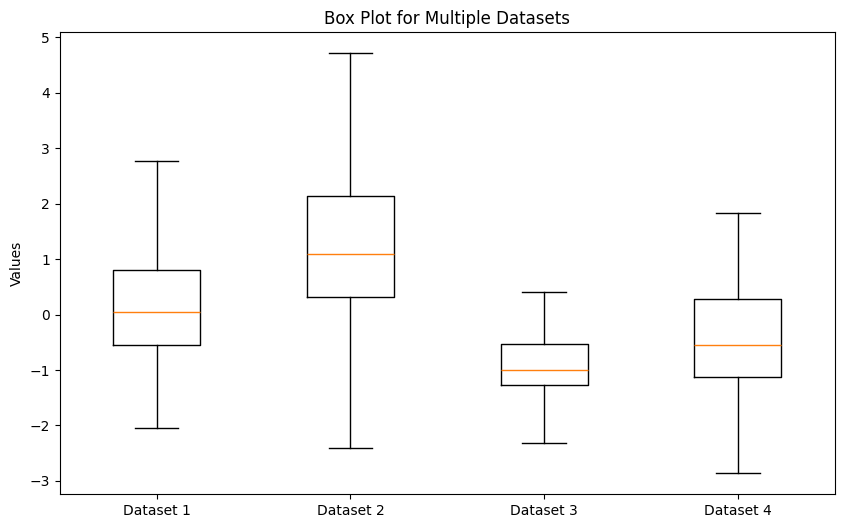

In [27]:
# Generating sample data for demonstration purposes
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 1.5, 100)
data3 = np.random.normal(-1, 0.5, 100)
data4 = np.random.normal(-0.5, 1, 100)

# Creating the data list with the sample datasets
data_list = [data1, data2, data3, data4]

# Create dataset and label for plotting
boxplot_data = []
labels = []
for index, data in enumerate(data_list, start=1):
    boxplot_data.append(data)
    labels.append(f'Dataset {index}')

#Plot data
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(boxplot_data)
ax.set_title('Box Plot for Multiple Datasets')
ax.set_ylabel('Values')
ax.set_xticks(range(1, len(boxplot_data) + 1))
ax.set_xticklabels(labels)
plt.show()

In the above code:
- `data_list` is a list containing the datasets you want to plot.
- We iterate over each dataset in the `data_list` using a for loop, adding the data to `boxplot_data` and creating labels for each dataset.
- Finally, we use `plt.boxplot()` to create the box plots for each dataset in `boxplot_data`, with corresponding labels.

By running this code, you can create box plots for multiple datasets one by one using a for loop.

## 14. "Axes" interface and "pyplot" interface (*optional*)

Matplotlib has [two main interfaces](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html). The explicit "Axes" interface uses methods on a Figure or Axes object to create visual elements step by step. Example: Creating a plot with `ax.plot()`. The implicit "pyplot" interface: Automatically manages Figures and Axes, adding elements to the last created plot. Example: Creating a plot with `plt.plot()`

Here is the above example, with the explicit "Axes" interface `ax.plot()`:

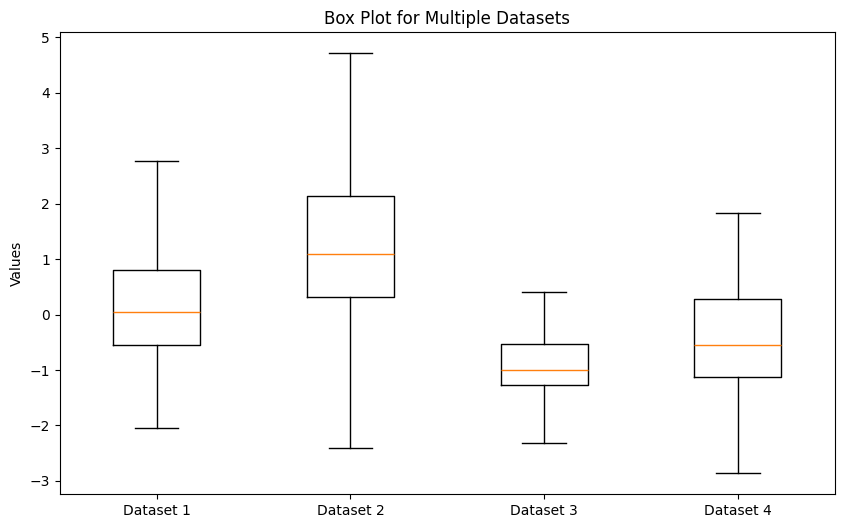

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(boxplot_data)
ax.set_title('Box Plot for Multiple Datasets')
ax.set_ylabel('Values')
ax.set_xticks(range(1, len(boxplot_data) + 1))
ax.set_xticklabels(labels)
plt.show()

The same example with the implicit "pyplot" interface`plt.plot()`:

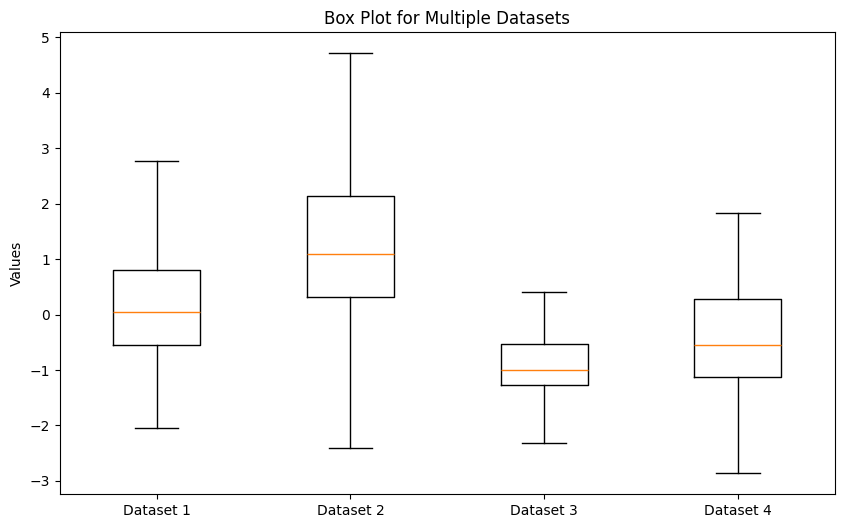

In [29]:
plt.subplots(figsize=(10, 6))

plt.boxplot(boxplot_data)
plt.title('Box Plot for Multiple Datasets')
plt.ylabel('Values')
plt.xticks(range(1, len(boxplot_data) + 1), labels)
plt.show()

Note how the methods names for these two interfaces are different (e.g., `ax.set_ylabel` vs. `plt.ylabel`).

---

## 15. Summary
* `Matplotlib` can be used to visualize datasets you are working with.
* You can customize various features such as labels and styles.
* There are a wide variety of plotting options available, including (but not limited to):
    * Line plots (`plot`)
    * Scatter plots (`scatter`)
    * Heatmaps (`imshow`)
    * Contour line and contour fill plots (`contour`, `contourf`)
* You can learn next about more plotting functionality such as histograms, pie charts, and animation

## Resources and References

The goal of this tutorial is to provide an overview of the use of the Matplotlib library. It covers creating simple line plots, but it is by no means comprehensive. For more information, try looking at the following documentation:
- [Matplotlib cheatsheets and handouts](https://matplotlib.org/cheatsheets/)
- [Matplotlib documentation](http://matplotlib.org)
- [Matplotlib examples gallery](https://matplotlib.org/stable/gallery/index.html)
- [GeoCAT examples gallery](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html)
 